In [ ]:
# pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("Train_Test_Network.csv")
for i in range (10):
    data = shuffle(data)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data.head(10)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,...,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type_backdoor,type_ddos,type_dos,type_injection,type_mitm,type_normal,type_password,type_ransomware,type_scanning,type_xss
32454,19769,4590,28601,1516,51,2,1,30,122,0,6,0,2,141,0,0,1,1,6,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
57486,31804,4614,43546,1522,938,2,0,0,0,0,6,0,1,22,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
194811,75638,4602,42351,1511,78,1,1,44241,231,2171,10,0,4,405,4,2729,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,True,False,False,False,False,False,False
218793,76287,4602,22215,1508,51,2,1,4286,52,39,10,0,1,45,1,38,1,1,1,3,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False
190441,75180,4603,35844,1516,78,1,1,4624,531,1563,10,0,5,761,6,1972,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,True,False,False,False,False,False,False
72739,38669,4614,28460,3921,938,2,0,0,0,0,6,0,1,22,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
378588,98402,4600,45316,1516,51,2,1,87109,34,454,10,0,1,27,1,453,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
222707,76307,4602,32224,1508,51,2,1,23778,46,33,10,0,1,39,1,32,1,1,1,3,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False
230567,76799,4614,31929,1522,938,2,0,0,0,0,6,0,1,22,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
459362,115161,4598,38310,1527,800,1,0,97,0,0,1,0,1,7,1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False,False,False,False,False,False,False,False


In [5]:

#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]
train_data = data.values
test_data = data.values

#前44列的資料進行訓練
X_train = train_data[:,0:44]
X_train =X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,44:]
Y_train =Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:44]

#第5列之後為訓練目標變量
Y_test = test_data[:,44:]
Y_test =Y_test.astype(float)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("=============")
print(X_train.dtype)
print(Y_test.dtype)

(461043, 44)
(461043, 10)
(461043, 44)
(461043, 10)
float64
float64


## XGB建置

In [6]:
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, Y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)


## 預測成功的比例

In [7]:
print('accuracy: ',xgboostModel.score(X_test,Y_test))

accuracy:  1.0


## KFold驗證

In [8]:
#kfold驗證
accuracy = cross_val_score(xgboostModel, X_test, Y_test, cv=10, scoring="accuracy")
print(accuracy)
print('accuracy: ',accuracy.mean()*100,'%')

[1.         1.         1.         1.         1.         0.99995662
 0.99995662 1.         1.         1.        ]
accuracy:  99.99913239632136 %


## 輸出混淆矩陣

In [13]:
Y_pred = predicted

Y_pred = np.argmax(Y_pred, axis=1).astype(int)
Y_test_2 = np.argmax(Y_test, axis=1).astype(int)

from sklearn.metrics import multilabel_confusion_matrix

#row=Y_test_2 col=Y_pred
cm=confusion_matrix(Y_test_2,Y_pred)
print(cm)

[[ 20000      0      0      0      0      0      0      0      0      0]
 [     0  20000      0      0      0      0      0      0      0      0]
 [     0      0  20000      0      0      0      0      0      0      0]
 [     0      0      0  20000      0      0      0      0      0      0]
 [     0      0      0      0   1043      0      0      0      0      0]
 [     0      0      0      0      0 300000      0      0      0      0]
 [     0      0      0      0      0      0  20000      0      0      0]
 [     0      0      0      0      0      0      0  20000      0      0]
 [     0      0      0      0      0      0      0      0  20000      0]
 [     0      0      0      0      0      0      0      0      0  20000]]


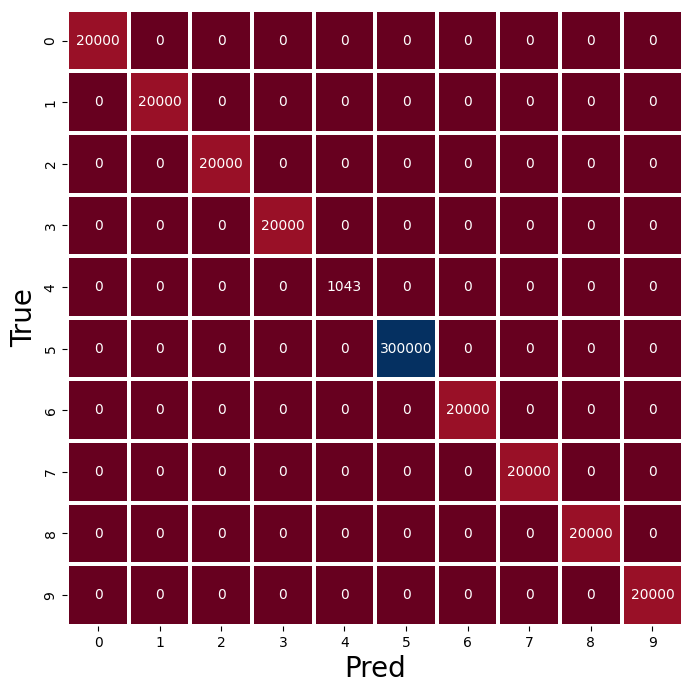

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()